<a href="https://colab.research.google.com/github/piyushsoni27/CNN_web/blob/master/CNN_train_test/CNN_train_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
"""
import os

os.chdir("drive/My Drive/Google colab projects/CNN_web")
"""

In [0]:
patches_dir = "cifar-10-batches-py/"

#imports

In [0]:
import numpy as np
import pickle
import os
import cv2

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import scipy

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

##Parameters to be set

In [0]:
## Minimum input image shape is (75, 75, 3) for inceptionV3 model.
input_size = (75, 75, 3)

num_classes = 10

##Download and load pre-trained *Inception V3* model

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

## Minimum input image shape is (75, 75, 3) for inceptionV3 model.

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=input_size, include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

##Loading and preparing data 

In [0]:
def load_cifar10_train_batch_util(batch_id):

    with open(os.path.join('cifar-10-batches-py','data_batch_' 
              + str(batch_id)), mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    features_batch = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels_batch = batch['labels']
    
    return features_batch, labels_batch

def load_train_data(im_shape = (32,32,3), one_hot_labels = True, num_classes = num_classes):
    features = np.zeros(shape = (50000, 32, 32, 3), dtype = np.uint8)
    labels = []

    for batch_id in range(1,6):
        x, y = load_cifar10_train_batch_util(batch_id)
        features[10000*(batch_id-1) : 10000*batch_id] = x
        labels.extend(y)
    
    if(one_hot_labels is True):
        labels = to_categorical(labels, num_classes)
    
    if(im_shape is not (32,32,3)):
      
      features_new = np.empty(shape=(features.shape[0],)+new_shape, dtype=np.uint8)
      for idx in range(features.shape[0]):
          features_new[idx] = scipy.misc.imresize(features[idx], new_shape)
      
      return features_new, labels
    
    else:
        return features, labels
      
def load_test_data(im_shape = (32,32,3)):
    
    with open(os.path.join('cifar-10-batches-py','test_batch'), mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
    
    if(im_shape is not (32,32,3)):
      
      features_new = np.empty(shape=(features.shape[0],)+new_shape, dtype=np.uint8)
      for idx in range(features.shape[0]):
          features_new[idx] = scipy.misc.imresize(features[idx], new_shape)
      
      return features_new
    
    else:
      return features

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


(10000, 75, 75, 3)
50000
(75, 75, 3)
5
253


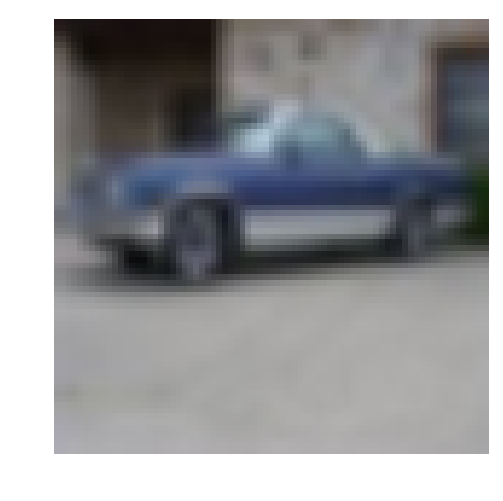

label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [115]:
x_train, y_train = load_train_data(im_shape = input_size)
x_test = load_test_data(im_shape = input_size)

print(x_test.shape)
print(len(y_train))
print(x_train[10000].shape) 

print(x_train[1].min())
print(x_train[1].max())

plt.axis('off')
plt.imshow(x_train[10000])
plt.show()

print("label: {}".format(y_train[10000]))

In [0]:
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow(x_train_new,  y_train)

In [0]:
for layer in pre_trained_model.layers:
  layer.trainable = False
  
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

